In [1]:
# -*- coding: utf-8 -*-
"""Ödev_2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1hiA1NKVBDvE1tHtwNMX-2yaaBzeGWU5I
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma.core import mean
import scipy.stats as stats

-----------------------------------------------------------------------------------------


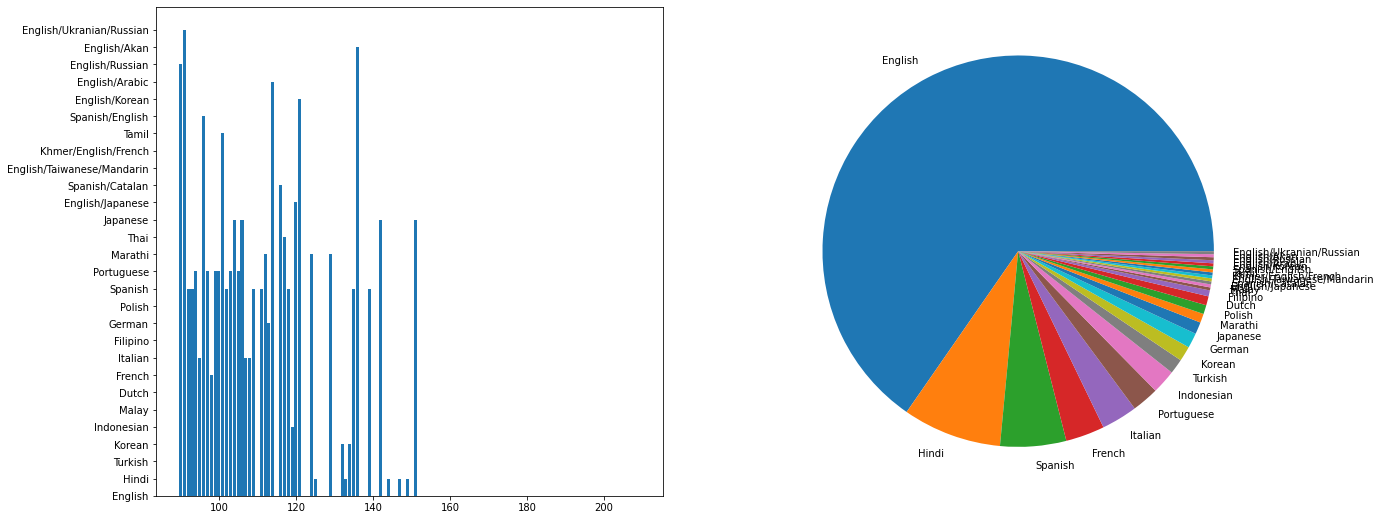

-----------------------------------------------------------------------------------------


In [2]:
#-------------------------------------------------------------------------------------------------#
# 1- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
print("-----------------------------------------------------------------------------------------")
veri=pd.read_csv('NetflixOriginals.csv',encoding = "ISO-8859-1")
veri=pd.DataFrame(veri)
uzun_metraj=veri[veri['Runtime']>=90] #Uzun metrajlı filmler 120 dk ve üstü olarak kabul edilip bir değişkene atandı.
fig=plt.figure(figsize=(20,9)) # 2 grafiklik bir grafik alanı oluşturuldu
ilk_grafik=fig.add_subplot(1,2,1) 
ilk_grafik.bar(uzun_metraj['Runtime'],uzun_metraj['Language']) # İlk grafik çubuk grafiği seçildi ve süresine göre diller grafiğe döküldü.
ikinci_grafik=fig.add_subplot(1,2,2) 
uzun_metraj_dil=uzun_metraj['Language'].value_counts() # Uzun metrajlı dil çeşitlerinin sayısı belirlendi.
ikinci_grafik.pie(uzun_metraj_dil,labels=uzun_metraj_dil.index) # 2. Pasta grafiği oluşturuldu.
plt.show()
print("-----------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


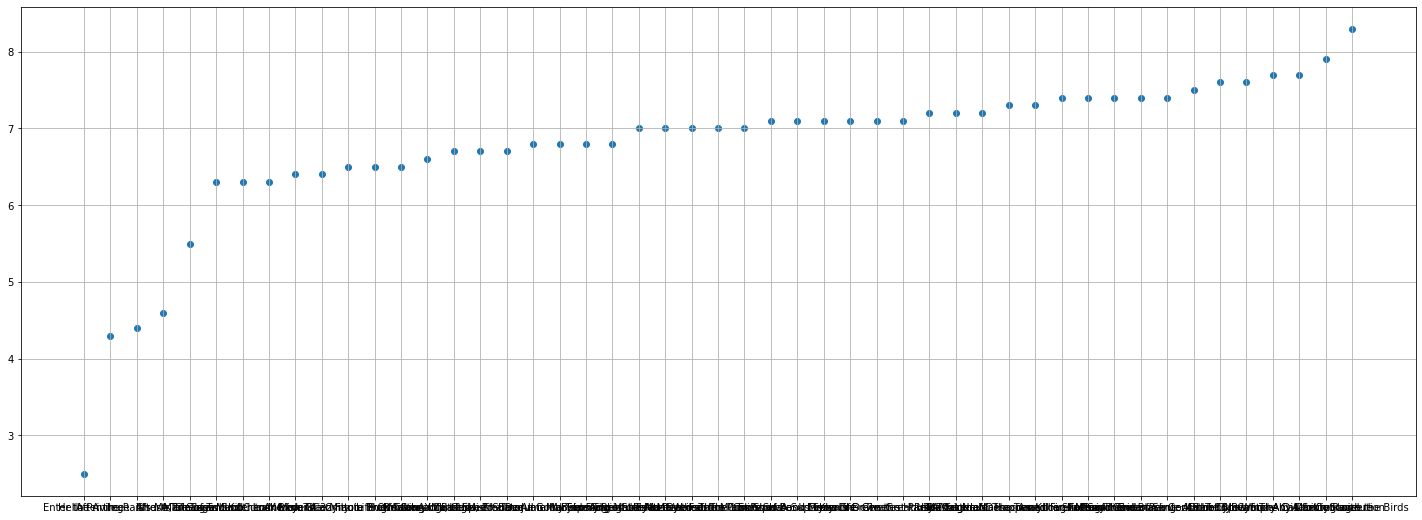

In [3]:

#-------------------------------------------------------------------------------------------------#
# 2- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
# belgeseller=veri['2019-01-01'<=veri['Premiere']]
print("-----------------------------------------------------------------------------------------")
veri['Premiere'] = pd.to_datetime(veri['Premiere']) # Tarih sütunundaki veriyi tarih formatına çavirdik.(Örneğin 2020-05-25 formatına)
filtered_df = veri.loc[(veri['Premiere'] >= '2019-01-01') & (veri['Premiere'] < '2020-06-01') & (veri['Genre']=='Documentary')] # Belli tarih aralığındaki veriyi aldık.
fig=plt.figure(figsize=(25,9))
ilk_grafik=fig.add_subplot(1,1,1)
ilk_grafik.scatter(filtered_df['Title'],filtered_df['IMDB Score']) # Nokta grafiği oluşturduk.
ilk_grafik.grid()
print("-----------------------------------------------------------------------------------------")

In [4]:
#-------------------------------------------------------------------------------------------------#
# 3-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir? max_imdb = english_max_imdb.max()['IMDB Score']
english_max_imdb=veri[veri['Language']=='English'] 
max_imdb = english_max_imdb.max()
print("3-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanı",max_imdb)
print("-----------------------------------------------------------------------------------------")

3-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanı Title                     Òlòt?ré
Genre                Zombie/Heist
Premiere      2021-05-27 00:00:00
Runtime                       209
IMDB Score                    9.0
Language                  English
dtype: object
-----------------------------------------------------------------------------------------


In [5]:
#-------------------------------------------------------------------------------------------------#
# 4- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
mean_runtime=veri[veri['Language']=='Hindi']
ortalama_süre = mean_runtime.mean(axis=0)
print(f"Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi: ",ortalama_süre)
print("-----------------------------------------------------------------------------------------")

Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi:  Runtime       115.787879
IMDB Score      5.981818
dtype: float64
-----------------------------------------------------------------------------------------


C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\1257325645.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ortalama_süre = mean_runtime.mean(axis=0)
C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\1257325645.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ortalama_süre = mean_runtime.mean(axis=0)


Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64
-----------------------------------------------------------------------------------------


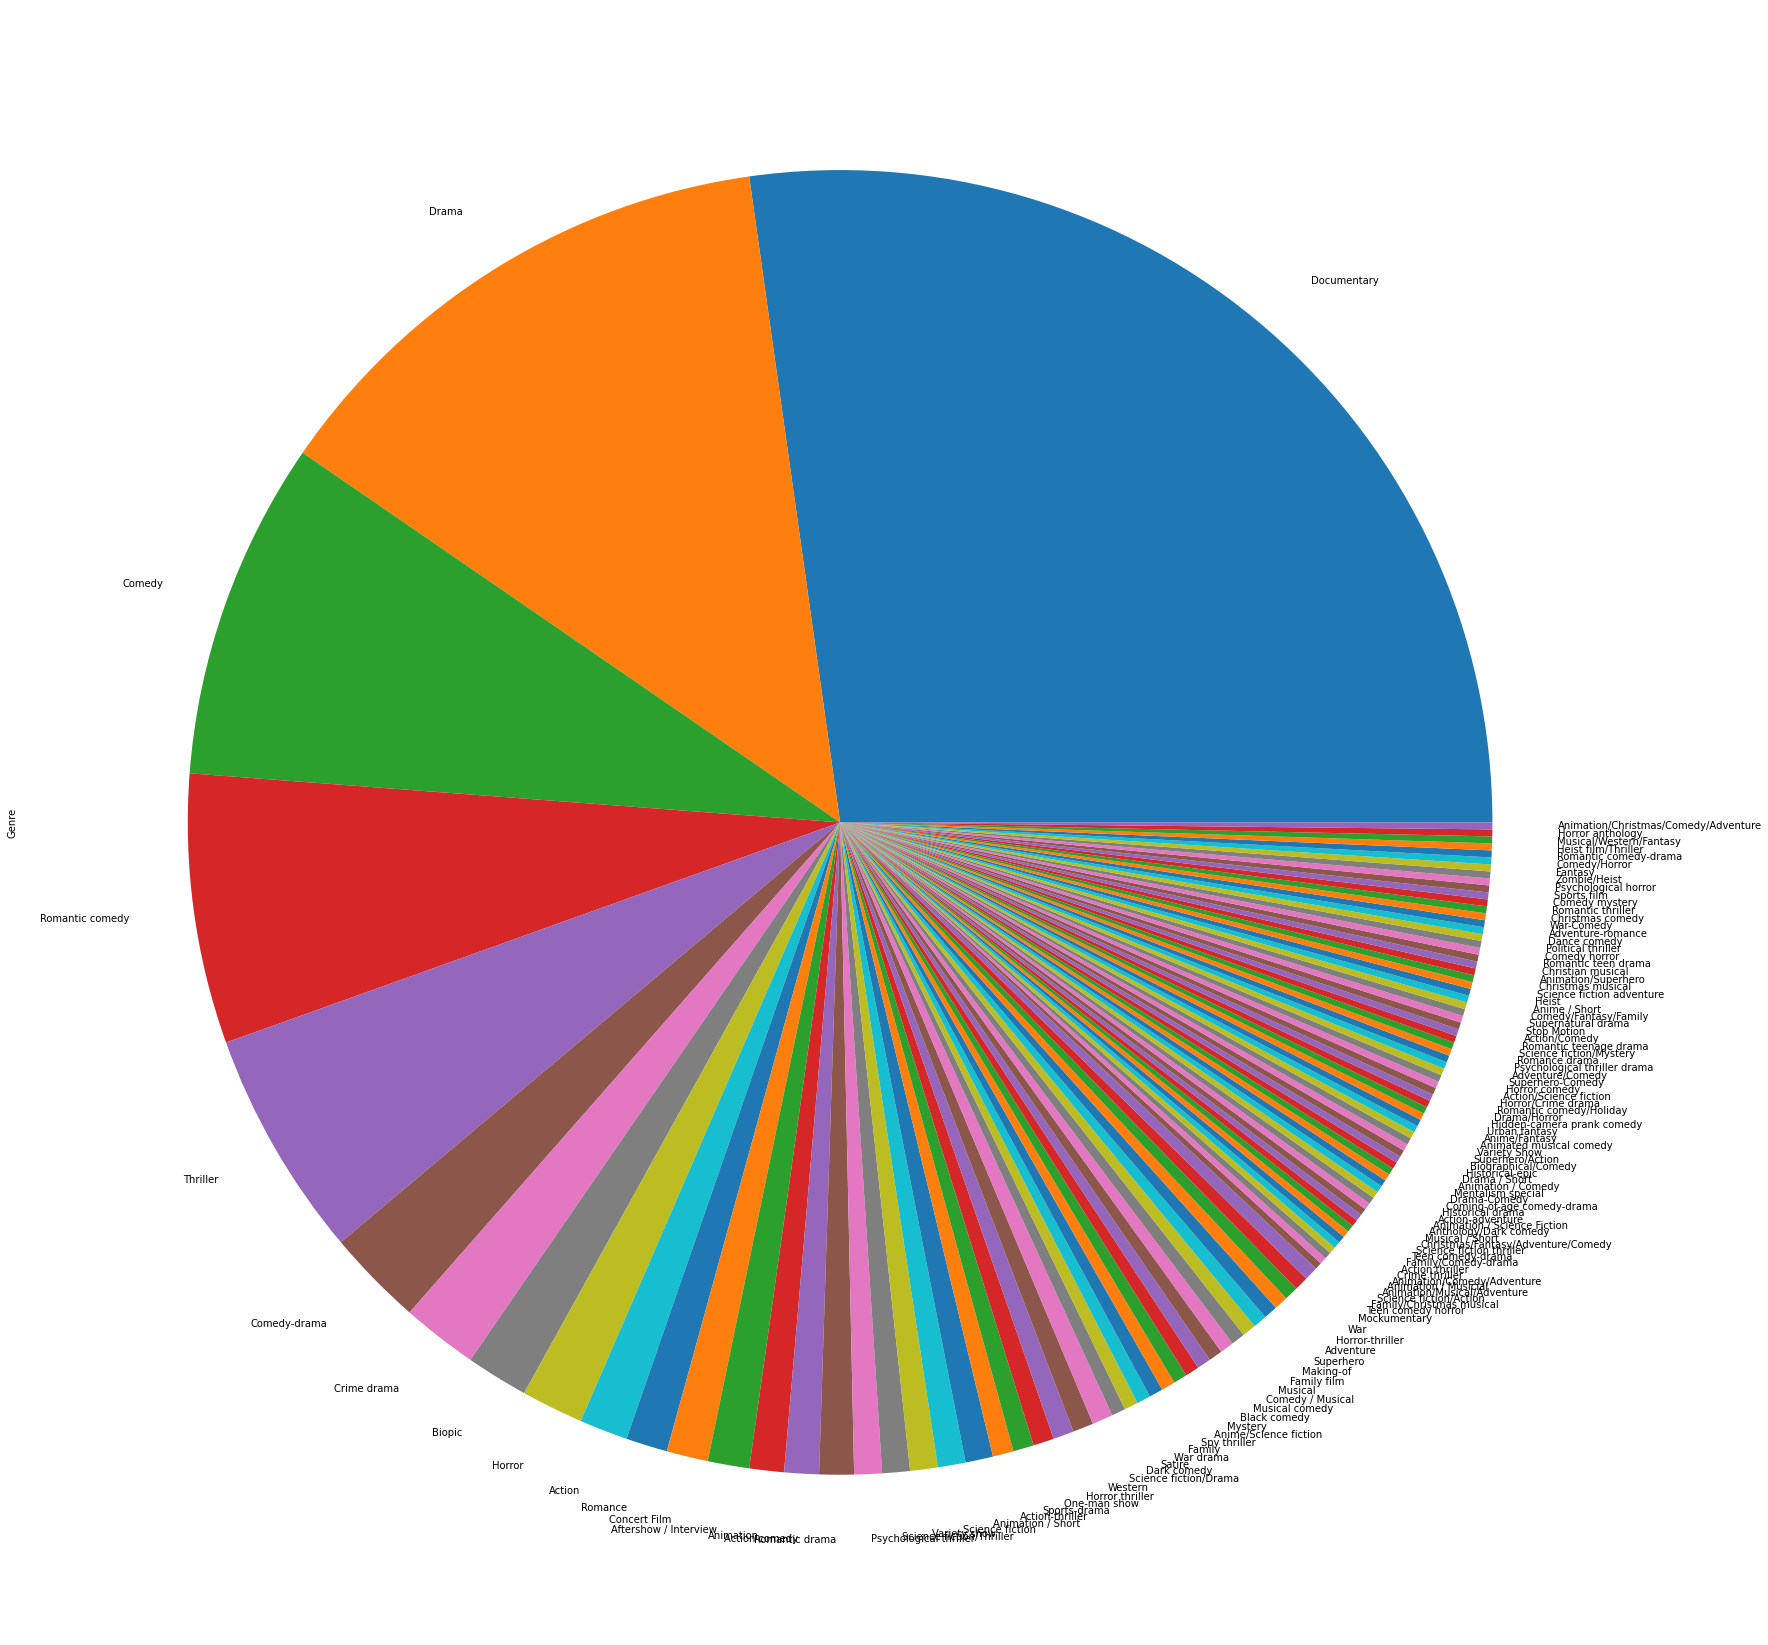

In [6]:
#-------------------------------------------------------------------------------------------------#
# 5- 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
türler=veri['Genre'].value_counts()
print(türler)
türler.plot.pie(subplots=True, figsize=(30, 30))
print("-----------------------------------------------------------------------------------------")

In [7]:
#-------------------------------------------------------------------------------------------------#
# 6- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
ilk_3_dil=veri['Language'].value_counts()
print("6- Veri setinde bulunan filmlerde en çok kullanılan 3 dil: \n ",ilk_3_dil.head(3))
print("-----------------------------------------------------------------------------------------")

6- Veri setinde bulunan filmlerde en çok kullanılan 3 dil: 
  English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64
-----------------------------------------------------------------------------------------


In [8]:

#-------------------------------------------------------------------------------------------------#
# 7- IMDB puanı en yüksek olan ilk 10 film hangileridir?
veri.sort_values(by=['IMDB Score'])
ilk_10_imdb=veri.tail(10)
print(f'7- IMDB puanı en yüksek olan ilk 10 film {ilk_10_imdb}')
print("-----------------------------------------------------------------------------------------")

7- IMDB puanı en yüksek olan ilk 10 film                                            Title         Genre   Premiere  \
574                                   Seaspiracy   Documentary 2021-03-24   
575        The Three Deaths of Marisela Escobedo   Documentary 2020-10-14   
576                      Cuba and the Cameraman    Documentary 2017-11-24   
577                       Dancing with the Birds   Documentary 2019-10-23   
578   Ben Platt: Live from Radio City Music Hall  Concert Film 2020-05-20   
579        Taylor Swift: Reputation Stadium Tour  Concert Film 2018-12-31   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary 2015-10-09   
581                      Springsteen on Broadway  One-man show 2018-12-16   
582    Emicida: AmarElo - It's All For Yesterday   Documentary 2020-12-08   
583     David Attenborough: A Life on Our Planet   Documentary 2020-10-04   

     Runtime  IMDB Score                  Language  
574       89         8.2                   English  
575  

-0.022930090743463378
-0.012890244562522392


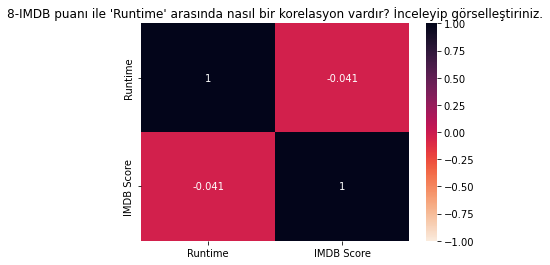

-----------------------------------------------------------------------------------------


In [9]:
#-------------------------------------------------------------------------------------------------#
#8---IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
imdb_Score=veri['IMDB Score']
Runtime=veri['Runtime']
corr, _ = stats.pearsonr (imdb_Score, Runtime)
corr
spearman_corr, _ = stats.spearmanr(imdb_Score, Runtime)
spearman_corr
kendall_corr, _ = stats.kendalltau(imdb_Score, Runtime)
kendall_corr
np.corrcoef(imdb_Score, Runtime)
print(imdb_Score.corr(Runtime, method='spearman'))
print(imdb_Score.corr(Runtime, method='kendall'))
veri.corr()
sns.heatmap(veri.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.title("8-IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.")
plt.show()
print("-----------------------------------------------------------------------------------------")


[{'imdb': 9.0, 'Genre': 'Documentary'}, {'imdb': 8.6, 'Genre': 'Documentary'}, {'imdb': 8.5, 'Genre': 'One-man show'}, {'imdb': 8.4, 'Genre': 'Concert Film'}, {'imdb': 8.4, 'Genre': 'Concert Film'}, {'imdb': 8.4, 'Genre': 'Documentary'}, {'imdb': 8.3, 'Genre': 'Documentary'}, {'imdb': 8.3, 'Genre': 'Documentary'}, {'imdb': 8.2, 'Genre': 'Documentary'}, {'imdb': 8.2, 'Genre': 'Documentary'}]


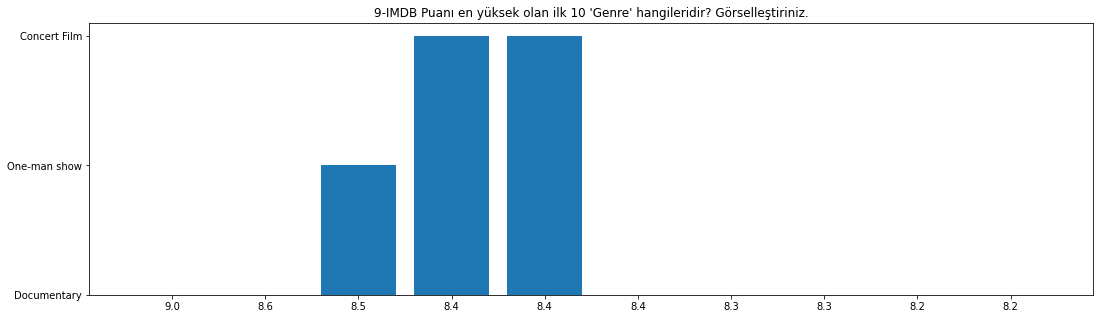

-----------------------------------------------------------------------------------------


In [10]:

#-------------------------------------------------------------------------------------------------#
#9---IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
sort_list=[]
imdb=veri['IMDB Score']
Genre=veri['Genre']
for i in range(len(imdb)):
  sort_list.append({
      'imdb':imdb[i],
      'Genre':Genre[i]
  })
X=sorted(sort_list, key=lambda x: x['imdb'], reverse=True)
top_10=X[:10]
print(top_10)
key=[]
values=[]
for i in range(len(top_10)):
  key.append(top_10[i]['imdb'])
  values.append(top_10[i]['Genre'])
f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(top_10)),values,tick_label=key)
plt.title("9-IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.")
plt.show()
print("-----------------------------------------------------------------------------------------")

[{'Runtime': 209, 'Title': 'The Irishman'}, {'Runtime': 155, 'Title': 'Da 5 Bloods'}, {'Runtime': 153, 'Title': 'Springsteen on Broadway'}, {'Runtime': 151, 'Title': 'Citation'}, {'Runtime': 151, 'Title': 'The Forest of Love'}, {'Runtime': 149, 'Title': 'The Last Days of American Crime'}, {'Runtime': 149, 'Title': 'Raat Akeli Hai'}, {'Runtime': 149, 'Title': 'Ludo'}, {'Runtime': 148, 'Title': 'Army of the Dead'}, {'Runtime': 147, 'Title': 'Drive'}]


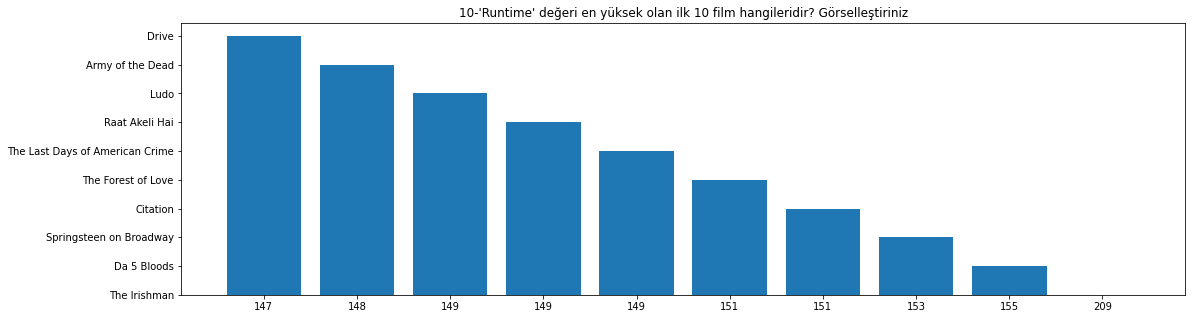

-----------------------------------------------------------------------------------------


In [11]:

#-------------------------------------------------------------------------------------------------#
#10 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
Runtimesort_list=[]
Runtime=veri['Runtime']
Name_film=veri['Title']
for i in range(len(Runtime)):
  Runtimesort_list.append({
      'Runtime':Runtime[i],
      'Title':Name_film[i]
  })
X=sorted(Runtimesort_list, key=lambda x: x['Runtime'], reverse=True)
Runtimetop_10=X[:10]
print(Runtimetop_10)
Runtimekey=[]
Runtimevalues=[]
for i in range(len(Runtimetop_10)):
  Runtimekey.append(Runtimetop_10[i]['Runtime'])
  Runtimevalues.append(Runtimetop_10[i]['Title'])
f, ax = plt.subplots(figsize=(18,5))
plt.gca().invert_xaxis()
plt.bar(range(len(Runtimetop_10)),Runtimevalues,tick_label=Runtimekey)
plt.title("10-'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz")
plt.show()
print("-----------------------------------------------------------------------------------------")

Premiere
2020-10-02    6
2019-11-01    5
2019-10-18    5
2020-10-30    4
2018-11-02    4
             ..
2019-04-05    1
2019-03-21    1
2019-03-13    1
2019-02-12    1
2021-05-27    1
Name: Title, Length: 387, dtype: int64


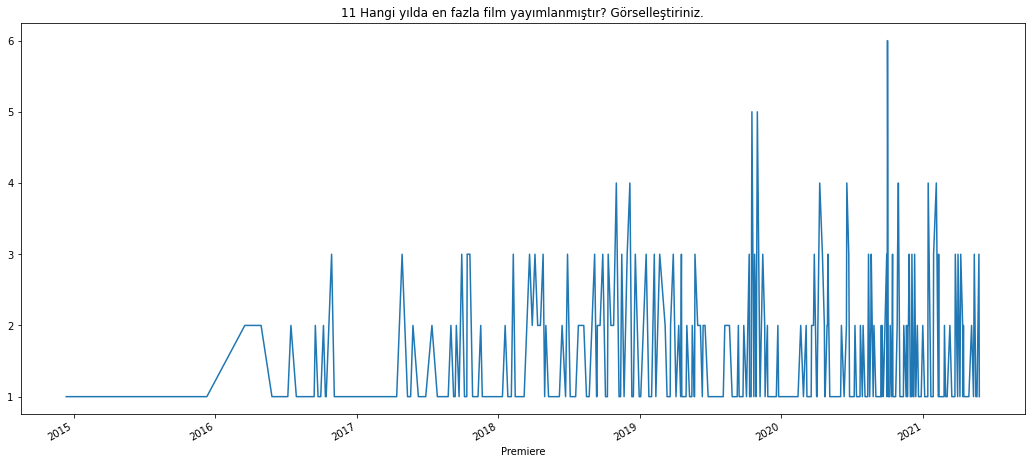

-----------------------------------------------------------------------------------------


In [12]:

#-------------------------------------------------------------------------------------------------#
#11 Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
yildaenfazlafilm=veri.groupby(['Premiere'])["Title"].count()
yildaenfazlafilm_siralama=yildaenfazlafilm.sort_values(ascending=False)
print(yildaenfazlafilm_siralama)
f, ax = plt.subplots(figsize=(18,8))
yildaenfazlafilm_siralama.plot(x='Sayisi', y='Yil')
plt.title("11 Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.")
plt.show()
print("-----------------------------------------------------------------------------------------")


Language
Bengali                         1
Norwegian                       1
Khmer/English/French            1
Spanish/Basque                  1
Spanish/Catalan                 1
Thia/English                    1
Spanish/English                 1
Georgian                        1
Swedish                         1
English/Ukranian/Russian        1
Malay                           1
English/Taiwanese/Mandarin      1
Tamil                           1
English/Russian                 1
English/Korean                  1
English/Arabic                  1
English/Akan                    1
English/Swedish                 1
Filipino                        2
English/Mandarin                2
English/Japanese                2
English/Hindi                   2
Thai                            2
Polish                          3
Dutch                           3
Marathi                         3
Turkish                         5
German                          5
English/Spanish                 5
Japan

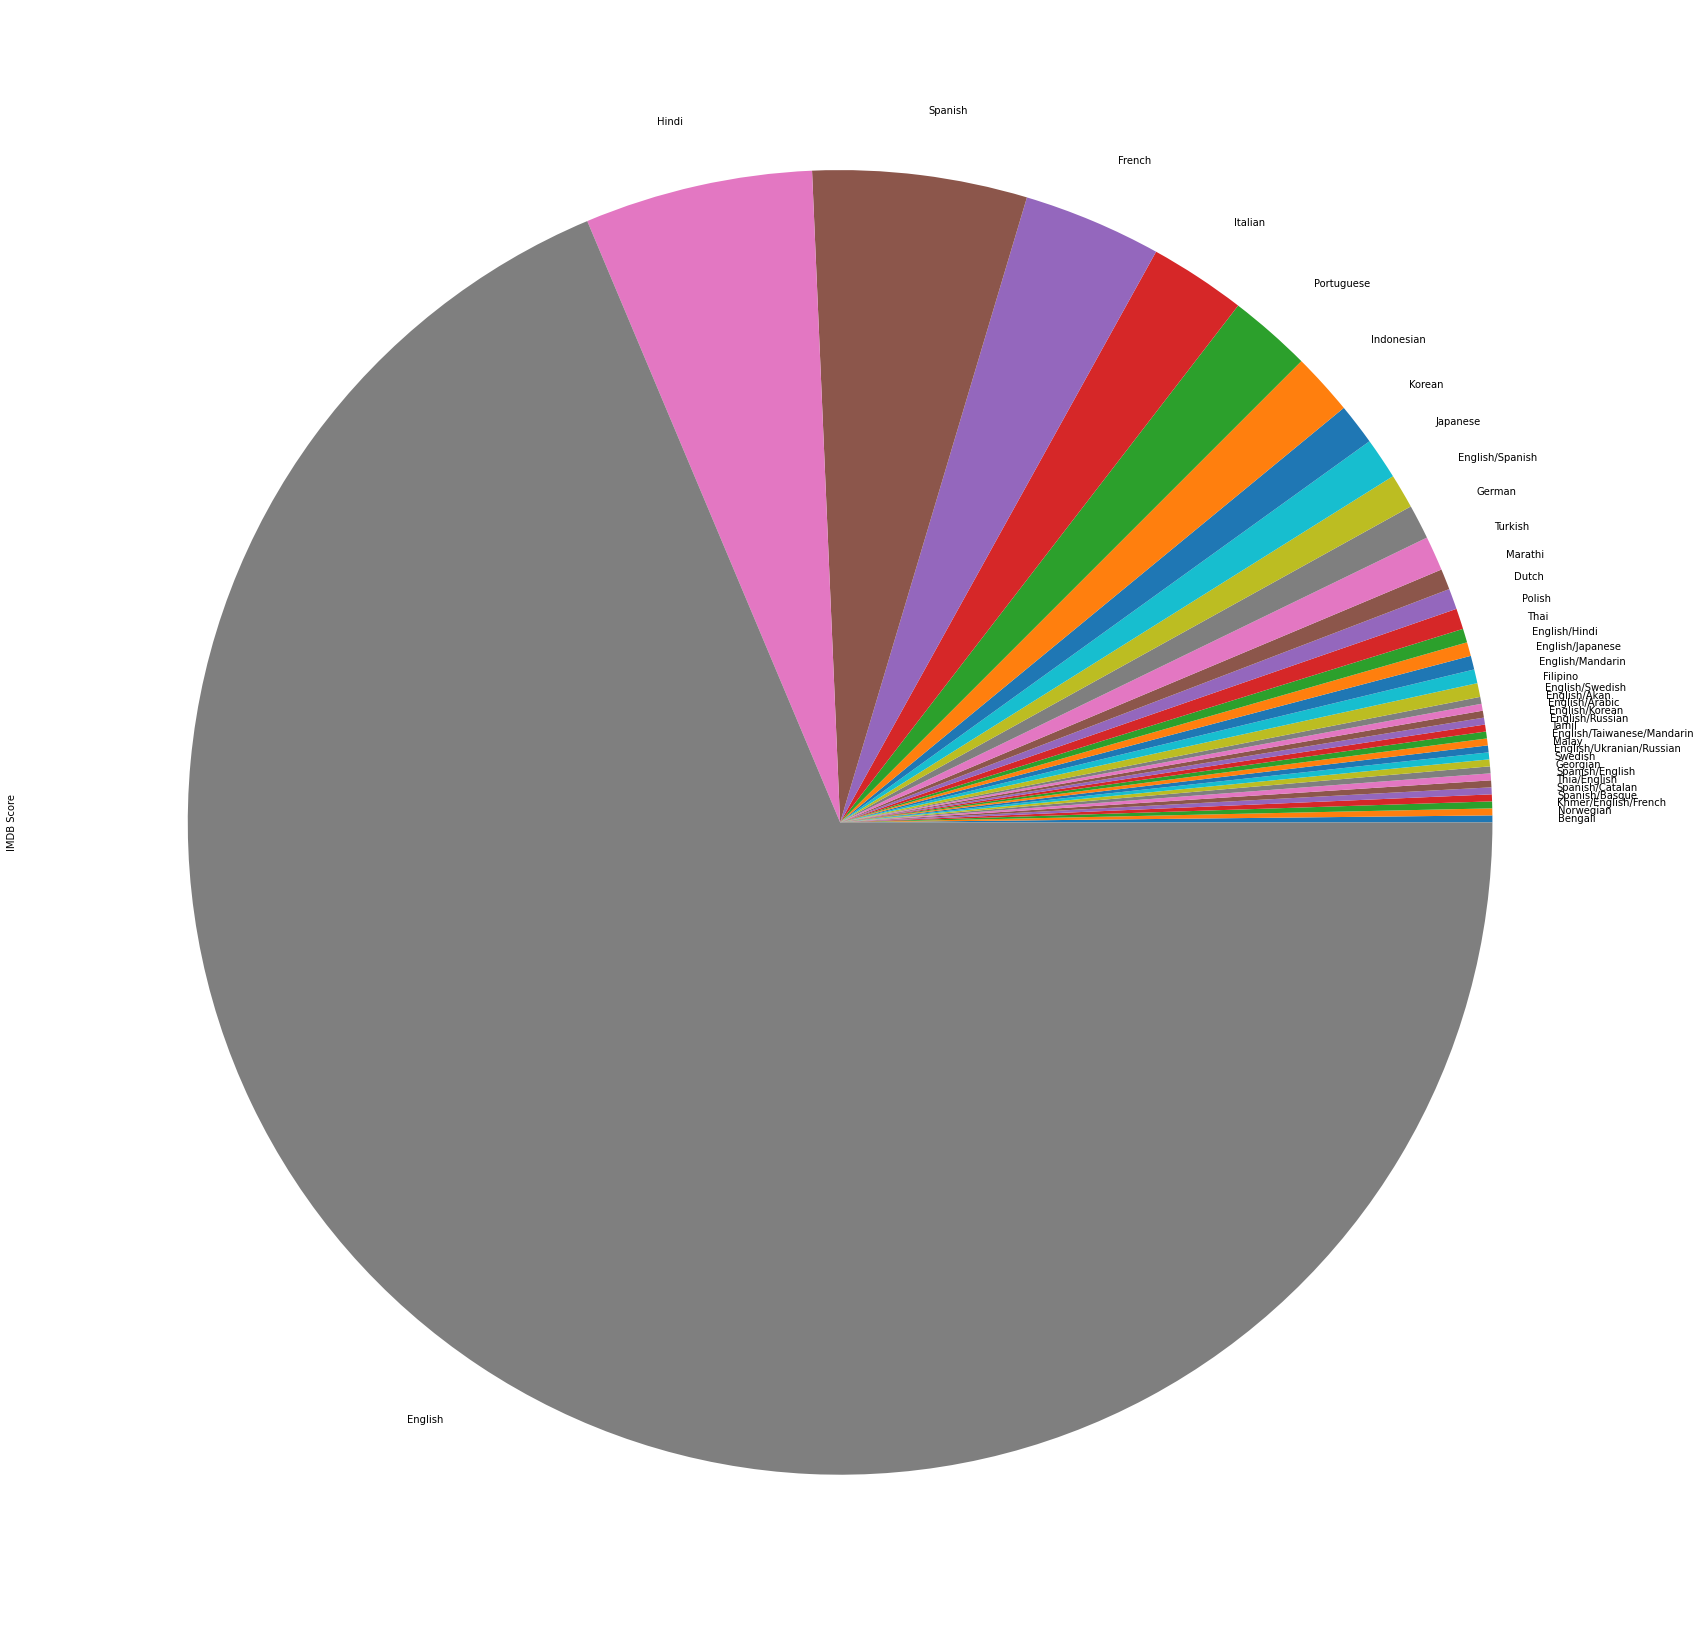

In [13]:
#-------------------------------------------------------------------------------------------------#
#12 Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

endskortalamaIMBD=veri.groupby(['Language'])["IMDB Score"].count()
endskortalamaIMBD_siralama=endskortalamaIMBD.sort_values(ascending=True)
print(endskortalamaIMBD_siralama)
endskortalamaIMBD_siralama.plot.pie(subplots=True, figsize=(30, 30))
print("-----------------------------------------------------------------------------------------")

In [14]:

#-------------------------------------------------------------------------------------------------#
#13 Hangi yılın toplam "runtime" süresi en fazladır?
runtimesüresi=veri.groupby(['Premiere'])["Runtime"].sum()
runtimesüresi_siralama=runtimesüresi.sort_values(ascending=False)
print(f'yılın toplam runtime süresi\n :{runtimesüresi_siralama}')
print("-----------------------------------------------------------------------------------------")

yılın toplam runtime süresi
 :Premiere
2020-10-02    600
2019-11-01    501
2019-10-18    492
2021-02-05    461
2020-06-19    396
             ... 
2019-06-27     15
2020-11-03     14
2019-10-29     13
2020-12-28      7
2020-04-02      4
Name: Runtime, Length: 387, dtype: int64
-----------------------------------------------------------------------------------------


In [15]:
#-------------------------------------------------------------------------------------------------#
# 14- Her bir dilin en fazla kullanıldığı "Genre" nedir?
 
diller=veri[veri['Language']=='English']
diller.value_counts('Genre'). head(1)
diller_kümesi=set()
for i in veri['Language']: # Her dilin bir kez bulunduğu ve her dili barındıran küme elemanını oluşturduk bu döngüde
  diller_kümesi.add(i) 
for x in diller_kümesi: # Bu döngüde de dil kümesindeki her bir dil üzerinde gezinerek o dile ait en fazla türü tespit ettik.
  dil=veri[veri['Language']==x]
  tür_sayısı=dil.value_counts('Genre').head(1)
  print(f'{x} dilinin en fazla kullanıldığı',tür_sayısı)
print("-----------------------------------------------------------------------------------------")

English/Akan dilinin en fazla kullanıldığı Genre
War drama    1
dtype: int64
English/Taiwanese/Mandarin dilinin en fazla kullanıldığı Genre
Drama    1
dtype: int64
Korean dilinin en fazla kullanıldığı Genre
Drama    2
dtype: int64
Norwegian dilinin en fazla kullanıldığı Genre
Horror    1
dtype: int64
Spanish/Catalan dilinin en fazla kullanıldığı Genre
Documentary    1
dtype: int64
Thai dilinin en fazla kullanıldığı Genre
Documentary    1
dtype: int64
English/Korean dilinin en fazla kullanıldığı Genre
Action-adventure    1
dtype: int64
Filipino dilinin en fazla kullanıldığı Genre
Drama    1
dtype: int64
Marathi dilinin en fazla kullanıldığı Genre
Drama    2
dtype: int64
French dilinin en fazla kullanıldığı Genre
Documentary    6
dtype: int64
Dutch dilinin en fazla kullanıldığı Genre
Crime drama    1
dtype: int64
Spanish/Basque dilinin en fazla kullanıldığı Genre
Black comedy    1
dtype: int64
Georgian dilinin en fazla kullanıldığı Genre
Documentary    1
dtype: int64
Tamil dilinin en faz

Hindi dilindeki filmlerin ortalama runtime süresi: Runtime       115.787879
IMDB Score      5.981818
dtype: float64
Dutch dilindeki filmlerin ortalama runtime süresi: Runtime       99.666667
IMDB Score     5.800000
dtype: float64


C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\3955163666.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ortalama_süre_hindi = mean_runtime_hindi.mean(axis=0)
C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\3955163666.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ortalama_süre_hindi = mean_runtime_hindi.mean(axis=0)
C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\3955163666.py:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ortalama_süre_dutch = mean_runtime_dutch.mean(axis=0)
C:\Users\mehme\AppData\Local\Temp\ipykernel_17420\3955163666.py:17: FutureWarning: Dropping of nuisance columns in DataFrame r

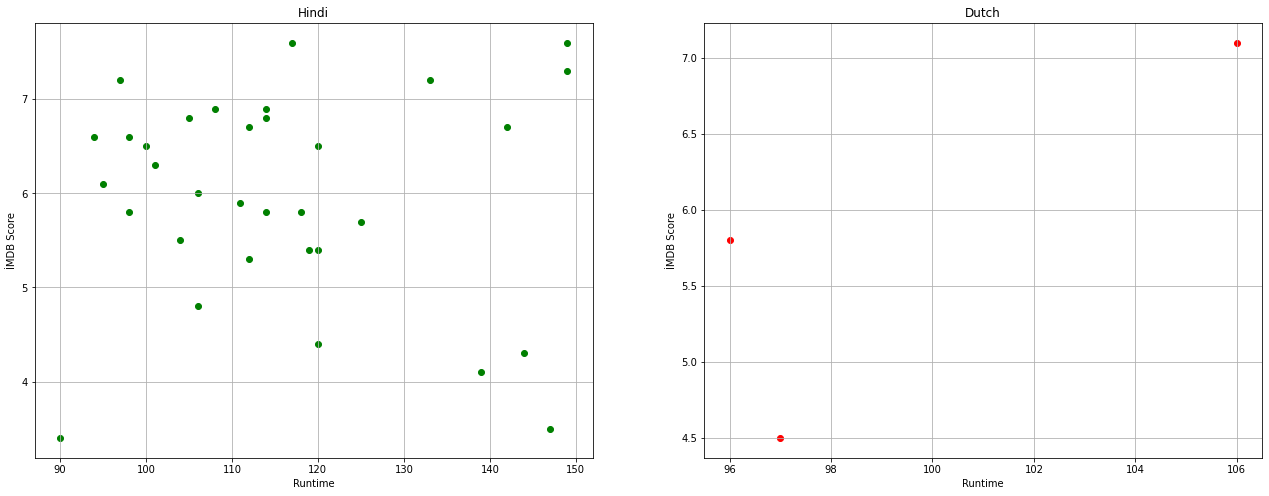

-----------------------------------------------------------------------------------------


In [16]:

#-------------------------------------------------------------------------------------------------#
# 15- Veri setinde outlier veri var mıdır? Açıklayınız.
""" Diğer gözlemlerden kayda değer derecede uzak olan gözleme aykırı veya uç değer denir.
Hindi dilindeki filmlerin ortalama runtime süresi ile imdb puanını kıyaslayalım. Hindi dilinin ortalama Runtime süresi 115 dakikadır. Ortalamanın üstündeki filmlerin
İMDB puanı düşüktür diye bir önerme ortaya atalım. Referans puan 6 olsun. Bu puanın altını düşük üstünü yüksek kabul edelim. Runtime ortalamasının ve referans İMDB puanının 
üstündeki film sayısı 6, altındaki film sayısı 8'dir. Görüldüğü gibi arada çok bir fark yoktur. 

Şimdi Dutch dilinin ortalama Runtime süresini inceleyelim. Dutch dilinin ortalama Runtime süresi 99.6 dakikadır. Ancak grafikte görüldüğü üzere 99.6'nın üzerinde
sadece bir adet veri var ve iki tanesi bu sürenin altındadır. 99.6'nın üzerinde olan değer burada ortalamayı tek başına yukarı taşıyarak yanıltıcı etki yapmıştır.
Dolayısıyla burada bir outlier veri vardır diyebiliriz.

Veri setinde outlier veri vardır.
"""
mean_runtime_hindi=veri[veri['Language']=='Hindi']
ortalama_süre_hindi = mean_runtime_hindi.mean(axis=0)
mean_runtime_dutch=veri[veri['Language']=='Dutch']
ortalama_süre_dutch = mean_runtime_dutch.mean(axis=0)
print('Hindi dilindeki filmlerin ortalama runtime süresi:',ortalama_süre_hindi)
print('Dutch dilindeki filmlerin ortalama runtime süresi:',ortalama_süre_dutch)
hindi_dilindeki_filmler=veri[veri['Language']=='Hindi']
dutch_dilindeki_filmler=veri[veri['Language']=='Dutch']
x1=hindi_dilindeki_filmler['Runtime']
y1=hindi_dilindeki_filmler['IMDB Score']
x2=dutch_dilindeki_filmler['Runtime']
y2=dutch_dilindeki_filmler['IMDB Score']

fig=plt.figure(figsize=(22,8))
ilk_grafik=fig.add_subplot(1,2,1) 
ilk_grafik.scatter(x1,y1,c='Green')
plt.xlabel("Runtime")
plt.ylabel("İMDB Score")
plt.title('Hindi')
plt.grid()
ikinci_grafik=fig.add_subplot(1,2,2) 
ikinci_grafik.scatter(x2,y2,c='Red')
plt.xlabel("Runtime")
plt.ylabel("İMDB Score")
plt.title('Dutch')
plt.grid()
plt.show()
print("-----------------------------------------------------------------------------------------")